

# Normal Distribution

In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

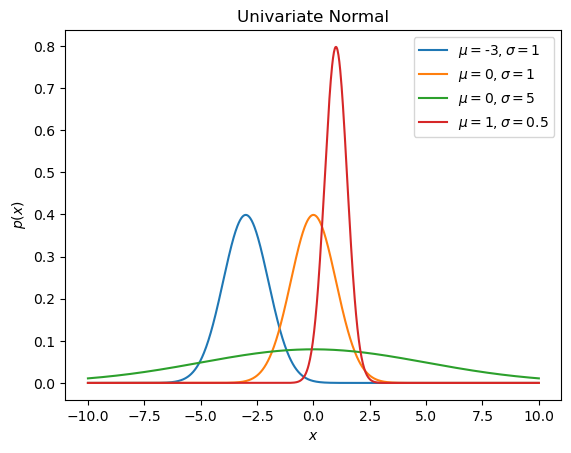

In [10]:
class Gaussian:
    def __init__(self, mu=0, sigma=1):
        self.mu, self.sigma = mu, sigma
        
    def density(self,x):
        return (2*np.pi*self.sigma**2)**(-.5) * np.exp(-.5* ((x - self.mu)/self.sigma)**2)

    
    def estimate_density(self, x):
    #as for set of samples coming from gaussian distribution the MLE estimate for mu and sigma are
    #the mean and standard deviation of the samples
        self.mu, self.sigma = np.mean(x), np.std(x)

    def sample_density(self,n):
        x = np.random.randn(n)                        #to sample from normal distribution N(0,1)
        x = self.mu + self.sigma*x                    #to make it samples from a gaussian distribution N(mu,sigma)
        return x


gaussian = Gaussian()                                       #Instantiate the Gaussian class
x_vals = np.linspace(-10,10, 1000)                          #generate 1000 evenly placed values of x from -10 to 10
params = [(-3,1), (0, 1), (0,5), (1,.5)]                    #Different mean and std dev of gaussian we want to consider
#plot the density for differnet mean and std dev
for mu, sigma in params:
    gaussian.mu, gaussian.sigma = mu, sigma
    p_vals = gaussian.density(x_vals)
    plt.plot(x_vals, p_vals, label=r"$\mu=$"+str(mu)+r"$, \sigma=$"+str(sigma))
    
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")
plt.legend()
plt.title(r"Univariate Normal")
plt.show()

### Central limit theorem

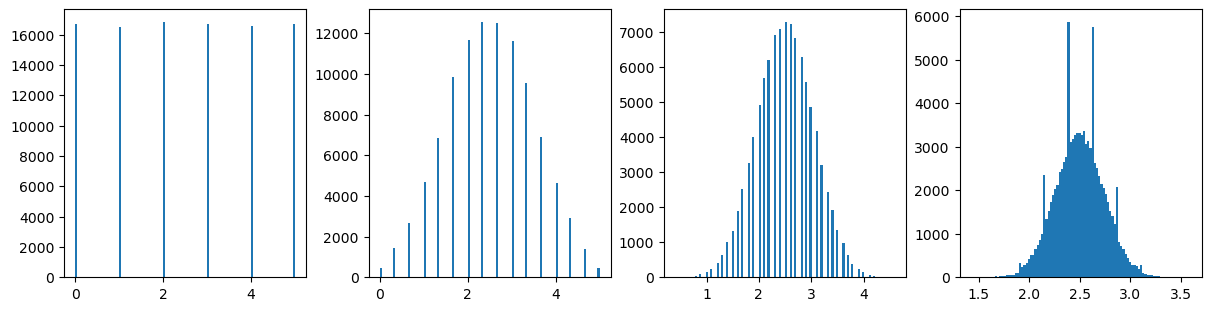

In [3]:
#number of dice to consider
#note that each dice is iid with an uniform distribution 2.5 (as the possible numbers on the faces of dice are 0,1,2,3,4,5)
num_dice = [1, 3, 10, 50]                                   
fig, axes = plt.subplots(ncols=len(num_dice), nrows=1, constrained_layout=True, figsize=(len(num_dice)*3, 3))
for i, n in enumerate(num_dice):
    trials = np.mean(np.random.randint(0,6, (n,100000)), axis = 0)           #we average the number on n dices for 100000 times and plot the distribution of the mean 
    axes[i].hist(trials, bins=100)                                        

### Maximum likelihood
Given a set of samples $x^{(1)}, \ldots, x^{(n)}$ from a Gaussian distribution, maximum likelihood estimates for $\mu$ and $\sigma$ are *mean* and *standard deviation* of the samples. One could derive this by maximizing the log-likelihood.

In [11]:
mu, sigma = 1,5
true_gaussian = Gaussian(mu = mu, sigma=sigma)                          #original distribution to sample
est_gaussian = Gaussian()
est_gaussian.estimate_density(gaussian.sample_density(1000000))                         #get the parameters of the gaussian which describes the data using MLE
print(f'mu, sigma {mu,sigma} sample estimate:{est_gaussian.mu, est_gaussian.sigma}')

mu, sigma (1, 5) sample estimate:(1.0002661027621216, 0.5001382094083174)


## Multivariate Gaussian
PDF of the multivariate Gaussian generalizes that of Univariate Gaussian in `d` dimensions
- think of the scalar $\sigma^2$ as a $1\times 1$ matrix. 
- the normalization term in the univariate case is $\sqrt{|2 \pi \sigma^2|}=\sqrt{2\pi\sigma^2}$.
- $\Sigma \in \!R^{d \times d}$ is the covariance matrix which replaces the variance $\sigma^2$. This gives
$\sqrt{|2 \pi \Sigma|} =  (2\pi)^{\frac{d}{2}} |\Sigma|^{\frac{1}{2}}$
    - we used the property of determinant $|c \Sigma| = c^d |\Sigma|$.
- we also need to replace $\sigma^2$ in $(\frac{x - \mu}{\sigma})^2$, but we can't divide by the matrix $\Sigma$. 
- equivalent quadratic form is $(x - \mu)^\top \Sigma^{-1} (x - \mu)$.

Putting these together we get

$$
p(x; \mu, \Sigma) = (2\pi)^{\frac{-d}{2}} |\Sigma|^{-\frac{1}{2}} \exp \left ({-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)} \right)
$$

Note that we have a collection of $x_i$s where $i\in\{1,..,n\}$ and let us consider they are already mean subtracted. We transpose and stack them as rows in a $2$-D matrix $X$ of size $n\times d$, then to vectorize the computation of  $x_i^\top \Sigma^{-1} x_i=q_i$ we can use $Q=((X\Sigma^{-1})\odot X)I$ where $Q$ would a column vector of dimension $n\times 1$ with $i$-th row given by $q_i$. Here $\odot$ is elementwise product and $I$ is identity column vector of dimension $d$. (Convince yourself with some linear algebra) 

In [16]:
class Gaussian():
    '''
    class for multivariate gaussian distribution
    '''
    def __init__(self, mu=0, sigma=0):
        self.mu = np.atleast_1d(mu)              #turns a scalar into 1D array otherwise preserves the arrray
        if np.array(sigma).ndim == 0:             #when sigma is scalar
            self.Sigma = np.atleast_2d(sigma**2)  #turns a scalar into 2D array otherwise preserves the arrray
        else:
            self.Sigma = sigma

    def density(self, x):
        n,d = x.shape
        xm = (x-self.mu[None,:])                                                    
        normalization = ((2*np.pi)**(-d/2.)) * np.linalg.det(self.Sigma)**(-1/2.)
        quadratic = np.sum((xm @ np.linalg.inv(self.Sigma)) * xm, axis=1)         
        return normalization * np.exp(-.5 *  quadratic)

    def estimate(self, x):
        n, d = x.shape
        self.mu = np.mean(x, axis=0)
        xm = x-self.mu
        self.Sigma = (xm.T @ xm)/n    



let's plot the density for an *bivariate*  Normal

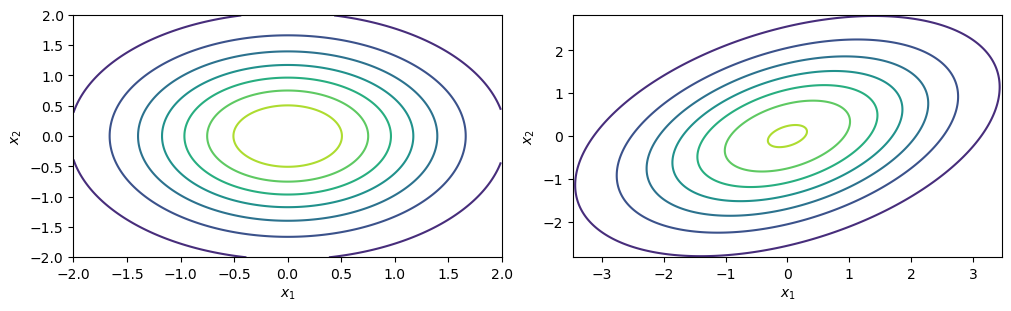

In [13]:
def plot_density(mu, Sigma, ax=None):                                 #only for 2D case
    r1 = mu[0]-2*np.sqrt(Sigma[0,0]), mu[0]+2*np.sqrt(Sigma[0,0])     #get the range of x axis in the grid
    r2 = mu[1]-2*np.sqrt(Sigma[1,1]), mu[1]+2*np.sqrt(Sigma[1,1])     #get the range of y axis in the grid
    x1, x2 = np.mgrid[r1[0]:r1[1]:.01, r2[0]:r2[1]:.01]               #get the meshgrid       
    x = np.vstack((x1.ravel(), x2.ravel())).T         #flatten it
    if not ax:
        ax = plt.gca()                                #if no axes is passed get the current Axes instance on the current figure
    p = Gaussian(mu,Sigma).density(x)                 #get the probability density values over the grid 
    #ax.set_aspect(1)
    ax.set_xlim(*r1)
    ax.set_ylim(*r2)
    ax.contour(x1, x2, p.reshape(x1.shape))           #plot the contours
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    return ax
    
#Take the parameters of two bivariate gaussian distribution
mu = np.zeros(2)
Sigma_list = np.array([[[1.,0],[0,1]],
             [[3,1.],[1.,2.]]])

fig, axes = plt.subplots(ncols=len(Sigma_list), nrows=1, constrained_layout=True, figsize=(10, 3))
for i, Sigma in enumerate(Sigma_list):
    plot_density(mu, np.array(Sigma), axes[i])
plt.show()

the **maximum likelihood** estimate is similarly calculated

In [17]:
#generate independent bivariate gaussian samples
x = np.random.randn(1000000,2)

gaussian = Gaussian()
gaussian.estimate(x)                    #MLE step
print(np.allclose(gaussian.Sigma, np.eye(2), atol=.01))    #we test the difference of two arrays with absolute tolerance of 0.01

True


let's fit a bivariate Gaussian to non-Gaussian data 

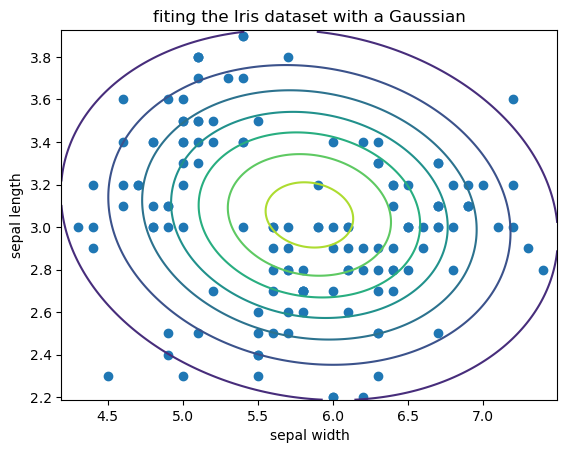

In [18]:
#data loading and slicing
from sklearn import datasets
dataset = datasets.load_iris()
x = dataset['data'][:,:2]

gaussian = Gaussian()
gaussian.estimate(x)                                  #MLE step
plt.plot(x[:,0], x[:,1], 'o')
plot_density(gaussian.mu, gaussian.Sigma)
plt.title("fiting the Iris dataset with a Gaussian")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.show()

### Linear transformations
Let's transform the samples by a linear transformation $Q \in \!R^{d \times d}$, and see what happens to covariance $\Sigma$.
$$
\Sigma' = \frac{1}{n} \sum_{\ell=1}^n Q (x^{(\ell)}-\mu) (x^{\ell} - \mu)^\top Q^\top = Q \left( \frac{1}{n} \sum_{\ell=1}^n (x^{(\ell)}-\mu) (x^{\ell} - \mu)^\top \right ) Q^\top = Q \Sigma Q^\top
$$

Text(0.5, 1.0, 'Bivariate gaussian distribution by MLE on transformed points')

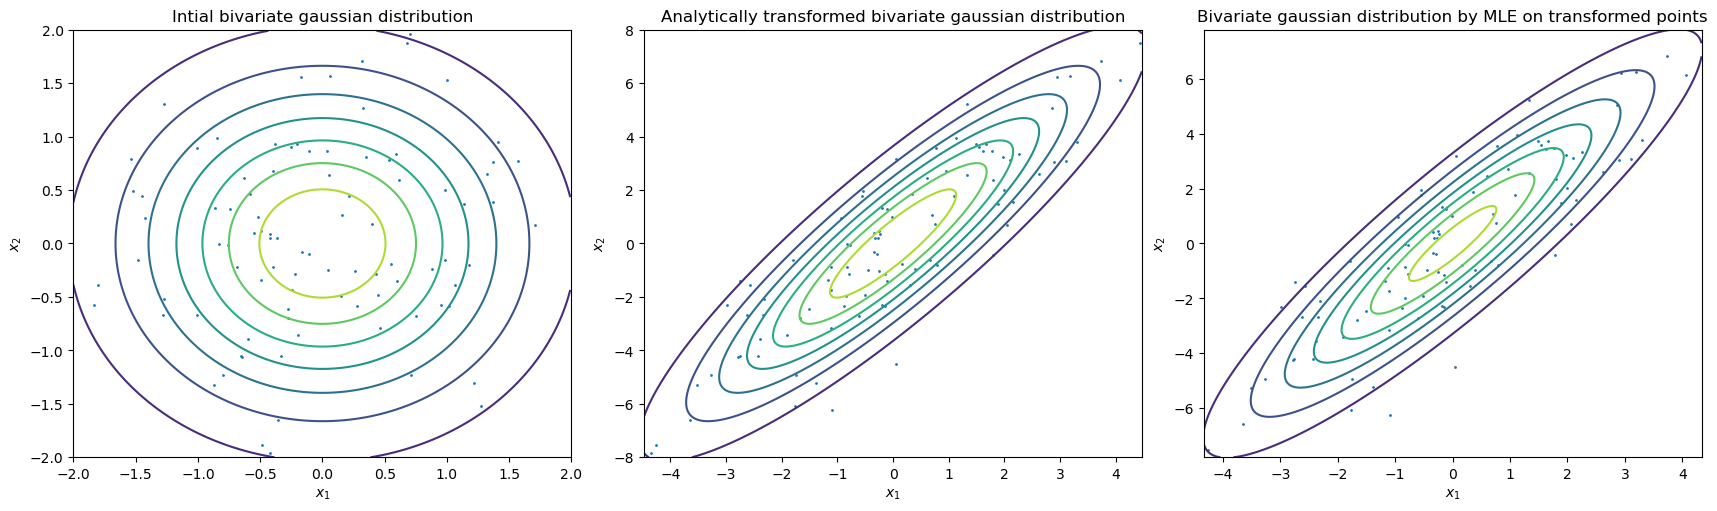

In [19]:
N,D = 100, 2
x = np.random.randn(N, 2)                   #generate N bivariate gaussian samples with both its dimensions uncorrelated
Sigma_x = np.eye(2)
Q = np.array([[1,2],[0,4]])                 #the linear transformation represented by matrix Q
y = x@Q.T                                   #transform all the 2D vectors in x by Q (again to vectorize it for all samples we do x@Q.T)
Sigma_y = Q@Sigma_x@Q.T                     #transform your covariance matrix using the expression given above

fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(17, 5))
plot_density(np.zeros(2), Sigma_x, axes[0])
axes[0].scatter(x[:,0], x[:,1], 1)
axes[0].set_title(r"Intial bivariate gaussian distribution")

plot_density(np.zeros(2), Sigma_y, axes[1])
axes[1].scatter(y[:,0], y[:,1], 1)
axes[1].set_title(r"Analytically transformed bivariate gaussian distribution")

gaussian = Gaussian()
gaussian.estimate(y)
plot_density(np.zeros(2), gaussian.Sigma, axes[2])
axes[2].scatter(y[:,0], y[:,1], 1)
axes[2].set_title(r"Bivariate gaussian distribution by MLE on transformed points")

Given a $\Sigma'$, we can always find a matrix $Q$ to make $\Sigma$ a diagonal matrix.
This means the density for a multivariate Normal with $\Sigma'$ as covariance can be produced starting from a Gaussian with diagonal covariance and linear transformation $Q$ of samples.
In fact, since $\Sigma'$ is symmetric and positive semi definite ($x^\top \Sigma' x \geq 0 \; \forall x$), $Q$ is an orthonormal matrix. 